<a href="https://colab.research.google.com/github/Ness731/kgu_bootcamp/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터셋 준비
(train_X, train_Y), (test_X, test_Y) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

In [ ]:
# 데이터 정규화
X_mean = train_X.mean(axis=0)
X_std = train_X.std(axis=0)
train_X = train_X - X_mean
train_X = train_X / X_std
test_X = test_X - X_mean
test_X = test_X / X_std

Y_mean = train_Y.mean(axis=0)
Y_std = train_Y.std(axis=0)
train_Y = train_Y - Y_mean
train_Y = train_Y / Y_std
test_Y = test_Y - Y_mean
test_Y = test_Y / Y_std

In [ ]:
# 모델 생성 : 2개의 hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(13, )),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05), loss='mse')
history = model.fit(train_X, train_Y, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 3s 18ms/step - loss: 0.9856 - val_loss: 0.3173
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3588 - val_loss: 0.1549
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3133 - val_loss: 0.2691
Epoch 4/30
11/11 [==============================] - 0s 5ms/step - loss: 0.3563 - val_loss: 0.3638
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3231 - val_loss: 0.1966
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 0.2082 - val_loss: 0.1792
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 0.1568 - val_loss: 0.1684
Epoch 8/30
11/11 [==============================] - 0s 5ms/step - loss: 0.1354 - val_loss: 0.2067
Epoch 9/30
11/11 [==============================] - 0s 4ms/step - loss: 0.1200 - val_loss: 0.1175
Epoch 10/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0878 - val_loss: 0.1391
Epoch 11/30
11/11 [==========

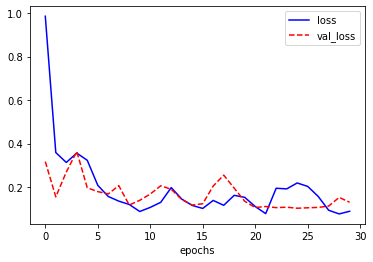

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

4/4 [==============================] - 0s 4ms/step


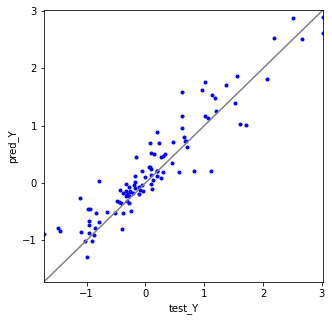

In [ ]:
pred_Y = model.predict(test_X)
plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="-", c=".5")

plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [ ]:
# 테스트 데이터 loss 측정
eva = model.evaluate(test_X, test_Y)
print(eva)

4/4 [==============================] - 0s 3ms/step - loss: 0.1231
0.12313398718833923
